In [1]:
import json as js
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans,AgglomerativeClustering, AffinityPropagation
data = []
with open('data_fetching/sadscore_data.json', 'r') as input_file:
    data = js.load(input_file)
data[1]

{'_id': '5c0dc1ec9d6b972a6343384b',
 'form_type': 'men',
 'form_version': 1,
 'responses': {'above_platinum': {'name': 'above_platinum',
   'score': 0,
   'value': False},
  'always_offer_to_pay': {'name': 'always_offer_to_pay',
   'score': 3,
   'value': True},
  'asian_community_prominent_figure': {'name': 'asian_community_prominent_figure',
   'score': 0,
   'value': False},
  'attractiveness': {'name': 'attractiveness', 'score': 0, 'value': '6'},
  'church_going': {'name': 'church_going', 'score': 0, 'value': False},
  'degree_acceptable': {'name': 'degree_acceptable',
   'score': 0,
   'value': False},
  'degree_graduated': {'name': 'degree_graduated', 'score': 0, 'value': False},
  'degree_masters': {'name': 'degree_masters', 'score': 0, 'value': False},
  'degree_phd': {'name': 'degree_phd', 'score': 0, 'value': False},
  'degree_waste_of_time': {'name': 'degree_waste_of_time',
   'score': 0,
   'value': False},
  'dress_like_fuccboi': {'name': 'dress_like_fuccboi',
   'score': 

In [2]:
import collections
result = collections.defaultdict(int)
attract_score = []
iq_score = []
iq_attract = {'iq':[],'attract':[]}
iq_attract_salary = {'iq':[],'attract':[],'salary':[],'color':[]}
iq_attract_salary_degree = {'iq':[],'attract':[],'salary':[],'degree':[]}
social = collections.defaultdict(list)
quality = collections.defaultdict(list)
for x in data:
    if 'responses' in x:
        tmp = x['responses']
        score1 = tmp['attractiveness']['value'] if 'attractiveness' in tmp and tmp['attractiveness']['value'] else '0'
        score2 = tmp['iq_score']['value'] if 'iq_score' in tmp and tmp['iq_score']['value']  else "0"
        if  'salary_over_200k' in tmp:
            if tmp['salary_over_200k']['value']:
                score3 = 3
                color = 'red'
            elif tmp['salary_over_100k']['value']:
                score3 = 2
                color = 'blue'
            else:
                score3 = 1
                color = 'green'
        else:
            score3 = 0
        iq_attract_salary['salary'].append(score3)
        iq_attract_salary['color'].append(color)
        
        for idx,s in enumerate(['degree_graduated','degree_masters','degree_phd']):
            if s in tmp:
                if tmp[s]['value']:
                    score4 = idx+1
                    break
        else:
            score4 = 0
        
        
        score2 = min(200,int(score2))
        score2 = max(70,int(score2))
        
        iq_attract['iq'].append(score2)
        iq_attract['attract'].append(score1)
        iq_attract_salary['iq'].append(score2)
        iq_attract_salary['attract'].append(score1)
        iq_attract_salary_degree['iq'].append(score2)
        iq_attract_salary_degree['attract'].append(int(score1))
        iq_attract_salary_degree['salary'].append(score3)
        iq_attract_salary_degree['degree'].append(score4)
        
        social_list = ['above_platinum','over_10k_instagram','kpop_dance_sing','church_going','asian_community_prominent_figure']
        quality_list = ['dress_like_fuccboi','ripped','perfect_vision','pi_tenth_digit','instrument_good','racist_against_other_asians']
        
        for x in social_list:
            if x in tmp and tmp[x]['value']:
                social[x].append(1)
            else:
                social[x].append(0)
        for x in quality_list:
            if x in tmp and tmp[x]['value']:
                quality[x].append(1) 
            else:
                quality[x].append(0)
        

        
        for key,value in tmp.items():
            result[key] +=1 if value['value'] else 0
        if 'attractiveness' in tmp:
            attract_score.append(tmp['attractiveness']['value'])
        if 'iq_score' in tmp:
            iq_score.append(tmp['iq_score']['value'])
del result['attractiveness']
del result['foreign_langauges_fluent']
del result['foreign_langauges_nonfluent']
del result['tattoos']
del result['iq_score']
del result['instruments']
del result['height_cm']
result

defaultdict(int,
            {'above_platinum': 197,
             'always_offer_to_pay': 652,
             'asian_community_prominent_figure': 209,
             'church_going': 166,
             'degree_acceptable': 831,
             'degree_graduated': 295,
             'degree_masters': 144,
             'degree_phd': 105,
             'degree_waste_of_time': 57,
             'dress_like_fuccboi': 209,
             'dropped_out': 3,
             'english_non_fluent': 2,
             'english_only': 39,
             'gpa_acceptable': 396,
             'instrument_good': 332,
             'job_unacceptable_not_student': 17,
             'kpop_dance_sing': 133,
             'let_the_girl_pay_if_she_wants': 462,
             'over_10k_instagram': 75,
             'perfect_vision': 258,
             'pi_tenth_digit': 373,
             'racist_against_other_asians': 184,
             'ripped': 226,
             'salary_over_100k': 250,
             'salary_over_200k': 130,
             'sa

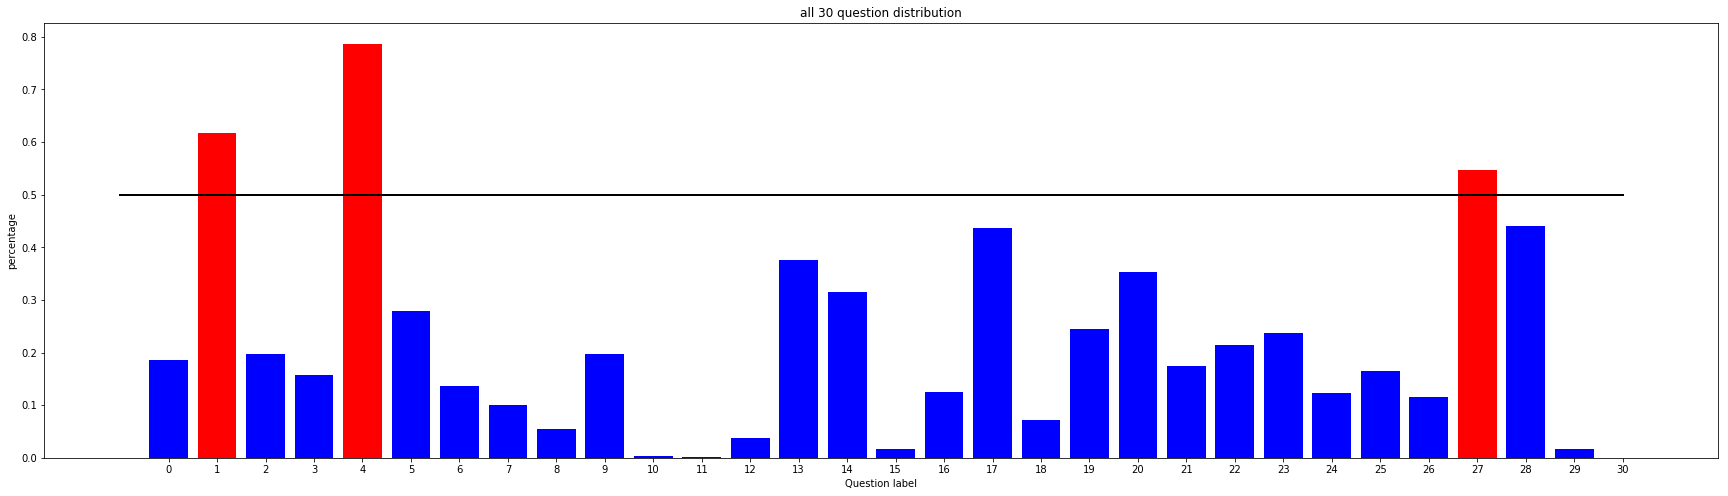

In [3]:
x = np.arange(len(result.keys()))
y = []
color = []
id_to_question = {}
good_question = []
i = 0
for key,val in result.items():
    id_to_question[i] = key
    i+=1
    y.append(val/1056)
    if val/1056 > 0.5 :
        color.append('red')
        good_question.append(key)
    else:
        color.append('blue')

plt.figure(figsize=(30,8))
plt.bar(x,y,color=color)
plt.plot([-1, 30], [0.5, 0.5], color='k', linestyle='-', linewidth=2)
plt.xticks(x)
plt.xlabel('Question label')
plt.ylabel('percentage')
plt.title('all 30 question distribution')
plt.show()

In [4]:
good_question

['always_offer_to_pay', 'degree_acceptable', 'scored_yourself']

In [5]:

def mybarplot(x,y,title,xlabel,ylabel):
    '''
    plot bar graph using x and y
    '''
    plt.bar(x,y,facecolor='#9999ff', edgecolor='white')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    for x, y in zip(x, y):
        plt.text(x, y ,'%s' %int(y), ha='center', va='bottom')
    plt.title(title)
    plt.show()


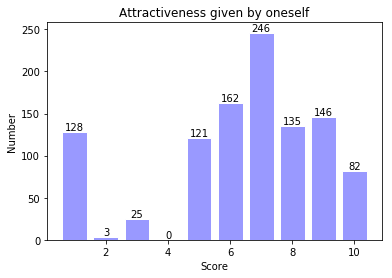

In [6]:

        
count_attract = collections.Counter(attract_score)
attract_x = np.arange(1,11)
attract_y = np.zeros(10)
for i in attract_x:
    if str(i) in count_attract:
        attract_y[i-1] = count_attract[str(i)]
mybarplot(attract_x,attract_y,'Attractiveness given by oneself','Score','Number')


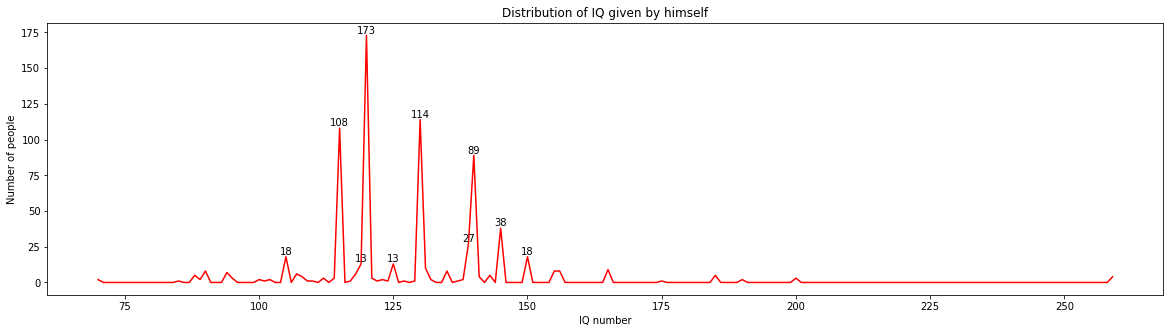

164.5

In [7]:
def draw_line(title,data_x,data_y,x_label,y_label):
    '''
    draw the line graph given x and y 
    '''
    assert len(data_x) == len(data_y)
    assert isinstance(x_label,str) and isinstance(y_label,str)
    
    plt.figure(figsize=(20,5))
    plt.plot(data_x,data_y,color='red', alpha=1.00)
    for x, y in zip(data_x, data_y):
        if int(y)>10:
            plt.text(x, y ,'%s' %int(y), ha='center', va='bottom')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
count_iq = collections.Counter(iq_score)
iq_x = np.arange(70,260)
iq_y = np.zeros(len(iq_x))
for key,val in count_iq.items():
    if not key:
        continue
    if int(key) >=260:
        iq_y[-1]+=1
    elif int(key)<=70:
        iq_y[0]+=1
    else:
        iq_y[int(key)-70] = int(val)   
draw_line('Distribution of IQ given by himself',iq_x,iq_y,'IQ number','Number of people')
np.mean(iq_x)

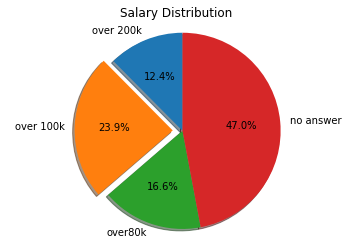

In [8]:
def draw_pie(data,label,title):
    '''
    Draw the pie graph
    '''
    assert len(data) == len(label)
    assert isinstance(title,str)
    labels = label
    values = data
    explode=(0,0.1,0,0)
    fig1, ax1 = plt.subplots()
    ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title(title)
    plt.show()
    
labels = ['over 200k','over 100k','over80k','no answer']
data = [result['salary_over_200k'],result['salary_over_100k'],result['salary_over_80k'],1056-390-174]
draw_pie(data,labels,'Salary Distribution ')

/Users/apple/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:2591: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


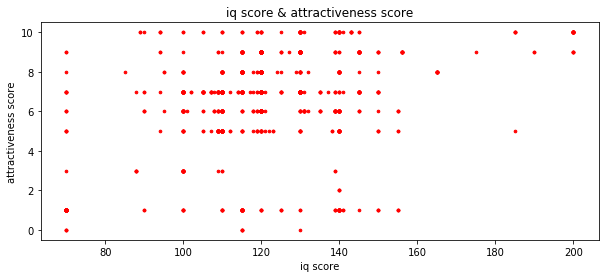

In [9]:
def scatter_2d(f1,f2,xlabel,ylabel,title):
    '''
    My 2D scatter plot 
    '''

    assert all(isinstance(x,str) for x in [xlabel,ylabel,title])
    plt.figure(figsize=(10,4))
    plt.title(title)
    plt.scatter(f1,f2, c='red', s=7)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

iq_attract = pd.DataFrame(iq_attract,dtype='int')
scatter_2d(iq_attract['iq'].values,iq_attract['attract'].values,'iq score','attractiveness score','iq score & attractiveness score')

In [10]:
def linear_expand(x):
    '''
    linear transfer a x
    '''
    return x*16+8

In [11]:
tmp = iq_attract.copy(deep=False)
tmp['attract'] = linear_expand(tmp['attract'])

In [12]:

def doKmeans(X, nclust=4):
    '''
    do a simple cluster alogrithm
    '''
    assert isinstance(nclust,int)
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(tmp, 3)
kmeans = pd.DataFrame(clust_labels)
tmp.insert((tmp.shape[1]),'kmeans',kmeans)

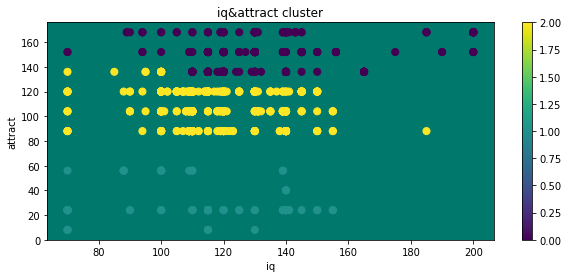

In [13]:
fig = plt.figure(figsize= (10,4))
ax = fig.add_subplot(111)
scatter = ax.scatter(tmp['iq'],tmp['attract'],
                     c=kmeans[0],s=50)
ax.set_facecolor('xkcd:salmon')
ax.set_facecolor((0.0, 0.47, 0.42))
ax.set_title('iq&attract cluster')
ax.set_xlabel('iq')
ax.set_ylabel('attract')
plt.colorbar(scatter)

In [14]:
iq_attract_salary = pd.DataFrame(iq_attract_salary,dtype='int')

/Users/apple/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:2591: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


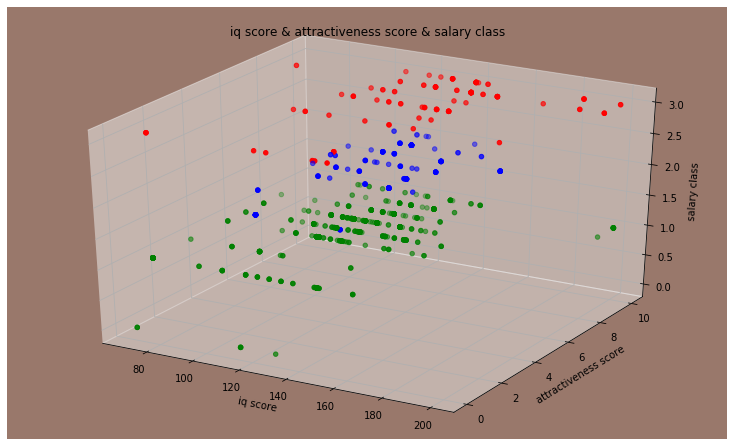

In [15]:

def draw_3d_scatter(f1,f2,f3,color,title,xlabel,ylabel,zlabel,colorbar=False):
    '''
    draw 3d scatter and give the dot oclor based on 4 dimension
    '''
    assert all(isinstance(x,str) for x in [title,xlabel,ylabel,zlabel])
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize= (10,6))
    ax = Axes3D(fig)
    ax.set_title(title)
    ax.scatter(f1,f2,f3, c=color)
    ax.set_facecolor('xkcd:salmon')
    ax.set_facecolor((0.6, 0.47, 0.42))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    if colorbar:
        plt.colorbar(scatter)


f1=iq_attract_salary['iq'].values
f2 = iq_attract_salary['attract'].values
f3 = iq_attract_salary['salary'].values
color = iq_attract_salary['color'].values
title = 'iq score & attractiveness score & salary class'
xlabel = 'iq score'
ylabel = 'attractiveness score'
zlabel = 'salary class'
draw_3d_scatter(f1,f2,f3,color,title,xlabel,ylabel,zlabel)

In [16]:
tmp = iq_attract_salary.drop(columns='color')
tmp['attract'] = tmp['attract'] = linear_expand(tmp['attract'])
tmp['salary'] = tmp['salary']*100

In [17]:

clust_labels, cent = doKmeans(tmp, 3)
kmeans = pd.DataFrame(clust_labels)
tmp.insert((tmp.shape[1]),'kmeans',kmeans)

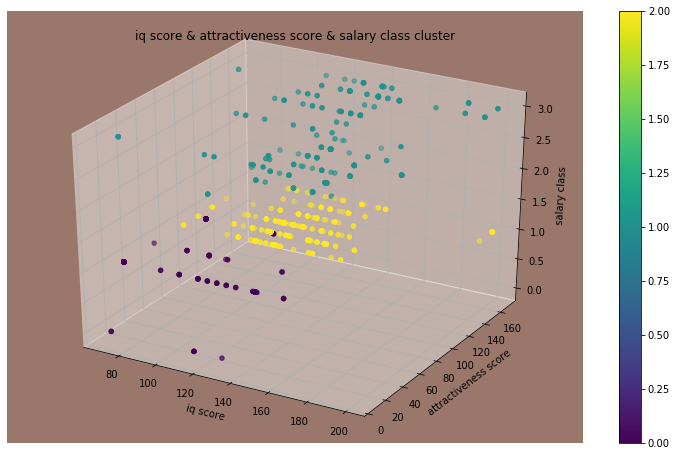

In [18]:
# fig = plt.figure(figsize= (10,4))

# ax = Axes3D(fig)
# scatter = ax.scatter(tmp['iq'],tmp['attract'],tmp['salary'],c=kmeans[0])
# ax.set_facecolor('xkcd:salmon')
# ax.set_facecolor((0.0, 0.47, 0.42))
# ax.set_title('iq&attract cluster')
# ax.set_xlabel('iq')
# ax.set_ylabel('attract')
# ax.set_zlabel('salary')


f1=tmp['iq']
f2 = tmp['attract']
f3 = tmp['salary']/100
color = tmp['kmeans']
title = 'iq score & attractiveness score & salary class cluster'
xlabel = 'iq score'
ylabel = 'attractiveness score'
zlabel = 'salary class'
draw_3d_scatter(f1,f2,f3,color,title,xlabel,ylabel,zlabel,colorbar = True)


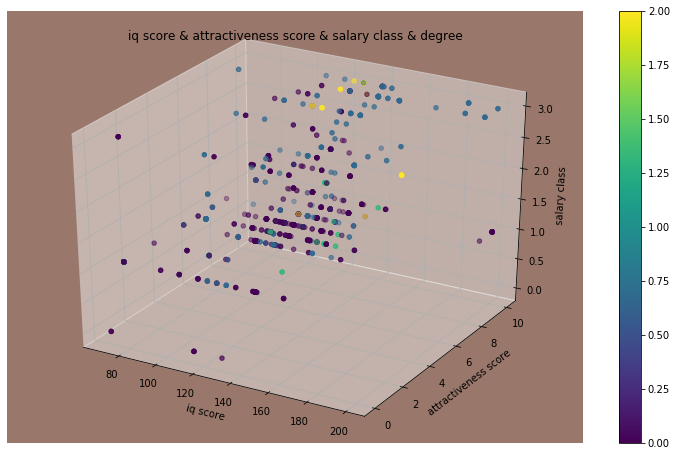

In [19]:
iq_attract_salary_degree = pd.DataFrame(iq_attract_salary_degree)
f1 = iq_attract_salary_degree['iq']
f2 = iq_attract_salary_degree['attract']
f3 = iq_attract_salary_degree['salary']
color = iq_attract_salary_degree['degree']
title = 'iq score & attractiveness score & salary class & degree'
xlabel = 'iq score'
ylabel = 'attractiveness score'
zlabel = 'salary class'

draw_3d_scatter(f1,f2,f3,color,title,xlabel,ylabel,zlabel,colorbar = True)


In [20]:
import seaborn as sns
def draw_corr_matrix(x):
    '''
    use seaborn to draw a correlation matrix for every pair of dimension
    '''
    plt.figure(figsize=(5,5))
    cor = x.corr()#Calculate the correlation of the above variables
    sns.heatmap(cor, square = True).set_title('correlation matrix')#Plot the correlation as heat map

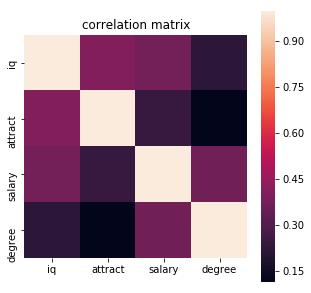

In [21]:
temp = iq_attract_salary_degree
draw_corr_matrix(temp)


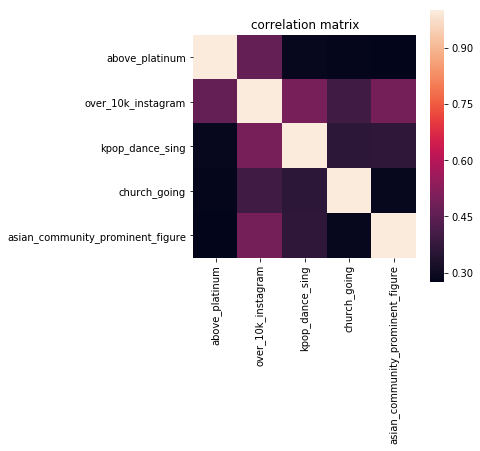

In [22]:
_social = pd.DataFrame(social)
draw_corr_matrix(_social)

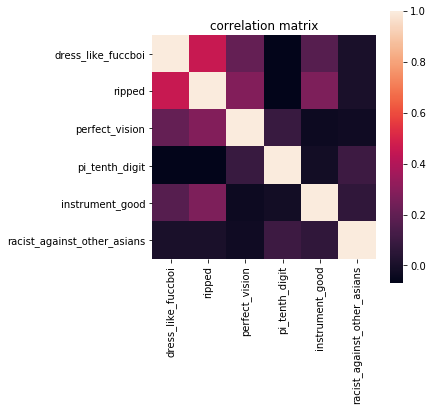

In [23]:
_quality = pd.DataFrame(quality)
draw_corr_matrix(_quality)

In [28]:
import plotly
import plotly.graph_objs as go
def draw_interactive(x,y,z,c,xlabel,ylabel,zlabel,filename):
    '''
    plot interactive 3D scatter data and upload to plotly server.
    '''
    plotly.tools.set_credentials_file(username='ymulin123', api_key='Qc9hVuhLhXg48ed8ew71')
    trace1 = go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='markers',
        marker=dict(
            size=8,
            colorbar=dict(
            title='Colorbar'
            ),
            color=c,                # set color to an array/list of desired values
            colorscale='Viridis',   # choose a colorscale
            opacity=0.8
        )
    )

    data = [trace1]
    layout = go.Layout(
                        scene = dict(
                        xaxis = dict(
                            title=xlabel),
                        yaxis = dict(
                            title=ylabel),
                        zaxis = dict(
                            nticks=4,
                            title=zlabel)),
                        margin=dict(
                        r=20, b=10,
                        l=10, t=10)
                      )
    fig = go.Figure(data=data, layout=layout)
    fig['layout']['scene'].update(go.layout.Scene(
        aspectmode='manual',
        aspectratio=go.layout.scene.Aspectratio(
            x=1.5, y=1.5, z=1
        )
    ))

    plotly.plotly.iplot(fig, filename=filename)

In [29]:
test = iq_attract_salary_degree
x,y,z,c= test['iq'],test['attract'],test['salary'],test['degree']
xlabel = 'IQ SCORE'
ylabel = 'ATTRACT SCORE'
zlabel = 'SALARY CLASS'
filename = '3elements'
draw_interactive(x,y,z,c,xlabel,ylabel,zlabel,filename)

/Users/apple/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [ ]:
# show the 
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='ymulin123', api_key='Qc9hVuhLhXg48ed8ew71')
x,y,z,c= tmp['iq'],tmp['attract'],tmp['salary'],tmp['kmeans']
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=8,
        colorbar=dict(
        title='Colorbar'
        ),
        color=c,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
                    scene = dict(
                    xaxis = dict(
                        title='IQ SCORE'),
                    yaxis = dict(
                        title='ATTRACT SCORE'),
                    zaxis = dict(
                        nticks=4,
                        title='SALARY')),
                    margin=dict(
                    r=20, b=10,
                    l=10, t=10)
                  )
fig = go.Figure(data=data, layout=layout)
fig['layout']['scene'].update(go.layout.Scene(
    aspectmode='manual',
    aspectratio=go.layout.scene.Aspectratio(
        x=1.5, y=1.5, z=1
    )
))

py.iplot(fig, filename='simple-3d-scatter')